In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.shape

(500, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [12]:
df.duplicated().sum()

0

In [14]:
df.drop(columns=['Serial No.'], inplace=True)

In [15]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
print(X)
print(y)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
495        332          108                  5  4.5   4.0  9.02         1
496        337          117                  5  5.0   5.0  9.87         1
497        330          120                  5  4.5   5.0  9.56         1
498        312          103                  4  4.0   5.0  8.43         0
499        327          113                  4  4.5   4.5  9.04         0

[500 rows x 7 columns]
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(400, 7) (100, 7)
(400,) (100,)


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [34]:
scaler

MinMaxScaler()

In [36]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [37]:
X_train_scaled

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [38]:
X_test_scaled

array([[0.88      , 0.85185185, 0.75      , 0.75      , 0.625     ,
        0.89430894, 1.        ],
       [0.48      , 0.55555556, 0.75      , 0.875     , 0.75      ,
        0.69105691, 1.        ],
       [0.5       , 0.44444444, 0.25      , 0.25      , 0.375     ,
        0.12601626, 0.        ],
       [0.44      , 0.59259259, 0.5       , 0.5       , 0.5       ,
        0.54878049, 0.        ],
       [0.72      , 0.7037037 , 0.5       , 0.625     , 0.5       ,
        0.69512195, 1.        ],
       [0.78      , 0.66666667, 0.75      , 0.875     , 0.75      ,
        0.76829268, 1.        ],
       [0.        , 0.25925926, 0.        , 0.125     , 0.25      ,
        0.08943089, 0.        ],
       [0.22      , 0.48148148, 0.75      , 0.375     , 0.5       ,
        0.45934959, 0.        ],
       [0.56      , 0.59259259, 0.5       , 0.625     , 0.75      ,
        0.76422764, 1.        ],
       [0.6       , 0.7037037 , 0.75      , 0.5       , 0.875     ,
        0.61788618, 1. 

In [39]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [49]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [55]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0165 - val_loss: 0.0214
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - val_loss: 0.0208
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - val_loss: 0.0202
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - val_loss: 0.0197
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - val_loss: 0.0192
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - val_loss: 0.0184
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - val_loss: 0.0180
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - val_loss: 0.0175
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - val_loss: 0.0169
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - val_loss: 0.0164
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - val_loss: 0.0159
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0

In [56]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8076946494963062

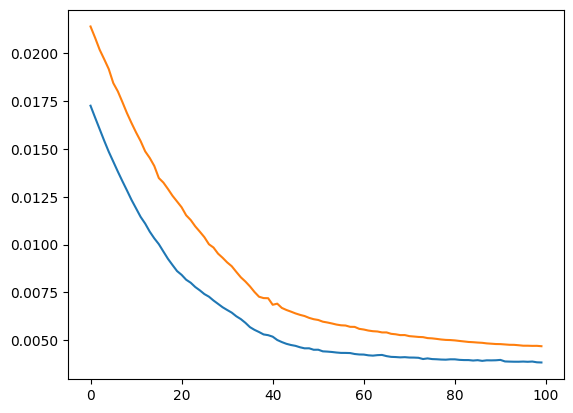

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])